In [5]:
import requests
import pandas as pd
from io import StringIO

url = "https://digitallibrary.un.org/record/4060887/files/2025_7_23_ga_voting.csv?ln=en"

response = requests.get(url)


In [8]:
import os
import pandas as pd

# TODO: add vetoes, vetoes are not included atm
def fetch_UN_data(dir_path=None):
    """
    Fetches and processes United Nations General Assembly and Security Council voting data.
    
    This function retrieves voting data from either local files or the UN Digital Library,
    and transforms the data into two formats: original and pivoted (transformed).
    
    Parameters:
    -----------
    dir_path : str, optional
        Path to directory where data should be read from or saved to.
        If None, data will be fetched from the UN Digital Library and not saved locally.
    
    Returns:
    --------
    tuple
        A tuple containing four DataFrames:
        - df_ga: Original GA voting data
        - df_ga_transformed: Pivoted GA voting data with countries as columns
        - df_sc: Original SC voting data
        - df_sc_transformed: Pivoted SC voting data with countries as columns
    
    Notes:
    ------
    - Currently, the Security Council data does not include veto information explicitly.
    """

    df_ga = None
    df_sc = None

    if dir_path:
        try:
            df_ga = pd.read_csv(f"{dir_path}/2025_7_23_ga_voting.csv")
            df_sc = pd.read_csv(f"{dir_path}/2025_7_21_sc_voting.csv")
        except FileNotFoundError:
            print("Not all data found locally. Fetching from UN Digital Library...")
    if df_ga is None or df_sc is None:
        ga_url = "https://digitallibrary.un.org/record/4060887/files/2025_7_23_ga_voting.csv?ln=en"
        sc_url = "https://digitallibrary.un.org/record/4055387/files/2025_7_21_sc_voting.csv?ln=en"

        try:
            df_ga = pd.read_csv(ga_url)
            df_sc = pd.read_csv(sc_url)

            # Save data locally if dir_path is provided
            if dir_path:
                # Check if directory exists, create it if it doesn't
                if not os.path.exists(dir_path):
                    os.makedirs(dir_path)
                    print(f"Created directory: {dir_path}")
                
                df_ga.to_csv(f"{dir_path}/2025_7_23_ga_voting.csv", index=False)
                df_sc.to_csv(f"{dir_path}/2025_7_21_sc_voting.csv", index=False)
        except Exception as e:
            print("Error fetching data from UN Digital Library. The dataset might has been updated. Check the date in the URL.")
            print(f"Error: {e}")
            return None, None, None, None
    
    # Transform ga data
    ga_index_columns = ["undl_id", "date", "session", "resolution", "draft", "committee_report", "meeting", "title", "agenda_title", "subjects", "total_yes", "total_no", "total_abstentions", "total_non_voting", "total_ms", "undl_link"]
    df_ga_transformed = df_ga.pivot(index=ga_index_columns, columns='ms_code', values='ms_vote').reset_index()
    df_ga_transformed.columns.name = None

    # Transform sc data
    sc_index_columns = ["undl_id", "date", "resolution", "draft", "meeting", "description", "agenda", "subjects", "modality", "total_yes", "total_no", "total_abstentions", "total_non_voting", "total_ms", "undl_link"]
    df_sc_transformed = df_sc.pivot(index=sc_index_columns, columns='ms_code', values='ms_vote').reset_index()
    df_sc_transformed.columns.name = None

    return df_ga, df_ga_transformed, df_sc, df_sc_transformed


In [9]:
df_ga, df_ga_transformed, df_sc, df_sc_transformed = fetch_UN_data(dir_path="C:\\Users\\janic\\OneDrive\\Desktop\\ETH\\UN Projekt\\data")

C:\Users\janic\AppData\Local\Temp\ipykernel_1756\1467307482.py:37: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ga = pd.read_csv(f"{dir_path}/2025_7_23_ga_voting.csv")


In [10]:
df_ga.columns.tolist()

['undl_id',
 'ms_code',
 'ms_name',
 'ms_vote',
 'date',
 'session',
 'resolution',
 'draft',
 'committee_report',
 'meeting',
 'title',
 'agenda_title',
 'subjects',
 'vote_note',
 'total_yes',
 'total_no',
 'total_abstentions',
 'total_non_voting',
 'total_ms',
 'undl_link']

# Display unique country codes and names

We want to check if there are country codes that map to multiple country names

In [11]:
len(df_ga['ms_code'].unique())

202

In [12]:
len(df_ga['ms_name'].unique())

243

In [13]:
# Group by ms_code and collect all unique names associated with each code
ms_code_to_names = df_ga.groupby('ms_code')['ms_name'].unique().reset_index()

# Display number of codes with multiple names
multiple_names_mask = ms_code_to_names['ms_name'].apply(len) > 1
multiple_names_count = multiple_names_mask.sum()

print(f"Total unique country codes: {len(ms_code_to_names)}")
print(f"Country codes with multiple names: {multiple_names_count}")

# Display codes with multiple names
if multiple_names_count > 0:
    print("\nCountry codes with multiple associated names:")
    for _, row in ms_code_to_names[multiple_names_mask].iterrows():
        print(f"{row['ms_code']}: {', '.join(row['ms_name'])}")

Total unique country codes: 202
Country codes with multiple names: 33

Country codes with multiple associated names:
BEN: BENIN, DAHOMEY
BFA: BURKINA FASO, UPPER VOLTA
BLR: BELARUS, BYELORUSSIAN SSR
BOL: BOLIVIA, BOLIVIA (PLURINATIONAL STATE OF)
CAF: CENTRAL AFRICAN REPUBLIC, CENTRAL AFRICAN EMPIRE
CIV: IVORY COAST, CÔTE D'IVOIRE, COTE D'IVOIRE
CMR: CAMEROON, UNITED REPUBLIC OF CAMEROON
COD: ZAIRE, DEMOCRATIC REPUBLIC OF THE CONGO, CONGO (LEOPOLDVILLE), CONGO (DEMOCRATIC REPUBLIC OF)
COG: CONGO, CONGO (BRAZZAVILLE)
CPV: CAPE VERDE, CABO VERDE
CZE: CZECH REPUBLIC, CZECHIA
EGY: EGYPT, UNITED ARAB REPUBLIC
IRN: IRAN (ISLAMIC REPUBLIC OF), IRAN
KHM: CAMBODIA, DEMOCRATIC KAMPUCHEA, KHMER REPUBLIC
KNA: SAINT KITTS AND NEVIS, SAINT CHRISTOPHER AND NEVIS
LAO: LAO PEOPLE'S DEMOCRATIC REPUBLIC, LAO PEOPLE's DEMOCRATIC REPUBLIC, LAOS
LBY: LIBYAN ARAB JAMAHIRIYA, LIBYA, LIBYAN ARAB REPUBLIC
LKA: SRI LANKA, CEYLON
MDV: MALDIVES, MALDIVE ISLANDS
MKD: THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA, NORTH 

In [14]:
# Create a DataFrame with country codes and names
country_mapping = []
for _, row in ms_code_to_names.iterrows():
    code = row['ms_code']
    names = row['ms_name']
    # If it's a list with one element, just take that element
    if len(names) == 1:
        country_mapping.append({'Code': code, 'Name': names[0]})
    else:
        # For multiple names, join them with ' / '
        country_mapping.append({'Code': code, 'Name': ' / '.join(names)})

# Convert to DataFrame and display
country_df = pd.DataFrame(country_mapping)
country_df = country_df.sort_values('Code')

# Display with nice formatting
print(f"Total countries: {len(country_df)}\n")
for i, row in country_df.iterrows():
    print(f"{row['Code']}: {row['Name']}")

Total countries: 202

AFG: AFGHANISTAN
AGO: ANGOLA
ALB: ALBANIA
AND: ANDORRA
ARE: UNITED ARAB EMIRATES
ARG: ARGENTINA
ARM: ARMENIA
ATG: ANTIGUA AND BARBUDA
AUS: AUSTRALIA
AUT: AUSTRIA
AZE: AZERBAIJAN
BDI: BURUNDI
BEL: BELGIUM
BEN: BENIN / DAHOMEY
BFA: BURKINA FASO / UPPER VOLTA
BGD: BANGLADESH
BGR: BULGARIA
BHR: BAHRAIN
BHS: BAHAMAS
BIH: BOSNIA AND HERZEGOVINA
BLR: BELARUS / BYELORUSSIAN SSR
BLZ: BELIZE
BOL: BOLIVIA / BOLIVIA (PLURINATIONAL STATE OF)
BRA: BRAZIL
BRB: BARBADOS
BRN: BRUNEI DARUSSALAM
BTN: BHUTAN
BWA: BOTSWANA
CAF: CENTRAL AFRICAN REPUBLIC / CENTRAL AFRICAN EMPIRE
CAN: CANADA
CHE: SWITZERLAND
CHL: CHILE
CHN: CHINA
CIV: IVORY COAST / CÔTE D'IVOIRE / COTE D'IVOIRE
CMR: CAMEROON / UNITED REPUBLIC OF CAMEROON
COD: ZAIRE / DEMOCRATIC REPUBLIC OF THE CONGO / CONGO (LEOPOLDVILLE) / CONGO (DEMOCRATIC REPUBLIC OF)
COG: CONGO / CONGO (BRAZZAVILLE)
COL: COLOMBIA
COM: COMOROS
CPV: CAPE VERDE / CABO VERDE
CRI: COSTA RICA
CSK: CZECHOSLOVAKIA
CUB: CUBA
CYP: CYPRUS
CZE: CZECH REPUBLIC / 

33 Countries have multiple names for the same country code. 

However one example that I noticed is that Yugoslavia (YUG) and Russian Federation (RUS) have separate country codes!

# Moving average of votes over time

So the idea here is to specify a time range that should be used for the moving average (say 6 months) and then for two specified countries (say USA and China) plot the moving average of agreement between these two countriess over time. Agreement for a vote $v$ is defined as:

$$
S_{v} = 1 - \frac{|V_{A,v} - V_{B,v}|}{2}
$$

We then calculate a moving average (simple, exponential, cumulative) over all votes in the specified time range. $V_{A,v}$ is one of the following three values {1 (yes), 0 (abstain), -1 (no)}, and specifies the vote of country A on resolution $v$.

Alternatively we can use the following definition from [this paper](https://www.notion.so/UN-Policy-Pulse-22ae9b7371948081bfc2dce6630b52d5?source=copy_link#24ce9b737194809ca64fead337e14857)

$$
S_{A,B} = 1 - \frac{\sum |v_{A,i} - v_{B,i}|}{N}
$$


where $v_{A,i}$ is the vote of country A on resolution i, $v_{B,i}$ is the vote of country B on resolution i, and $N$ is the total number of resolutions both countries voted on in the specified time range.


TODO:
- What to do with missing values? 
- Include start and end datum
- Use plotly for interactive plots
- add option for groups
- add option for sessions
- add options to include ga/sc

In [68]:
import matplotlib.pyplot as plt

countries = ['ARG', 'USA']
time_span = 365 # days
start_date = None
end_date = None

def moving_average(df, countries, time_span=365, start_date=None, end_date=None):
    """Calculate moving average of agreement between two countries over time."""

    df_ma = df[["undl_id", "date"] + countries].copy()

    def calc_agreement(row, countries): # Current version only supports 2 countries
        # Map vote values to numeric values for calculation
        vote_mapping = {"Y": 1, "A": 0, "N": -1}
        
        # Check if both countries have valid votes
        if row[countries[0]] in vote_mapping and row[countries[1]] in vote_mapping:
            # Calculate the absolute difference between votes
            diff = abs(vote_mapping[row[countries[0]]] - vote_mapping[row[countries[1]]])
            # Calculate agreement value (1 - diff/2)
            # Max difference is 2, so we divide by 2 to normalize to [0,1]
            agreement = 1 - (diff / 2)
            return agreement
        else:
            # Return NaN if either country didn't vote or had an invalid vote
            return float('nan')

    # Calculate agreement
    df_ma['agreement'] = df_ma.apply(lambda row: calc_agreement(row, countries), axis=1)
    df_ma['date'] = pd.to_datetime(df_ma['date'])
    df_ma = df_ma.sort_values('date')

    # Filter for start_date and end_date
    if start_date:
        df_ma = df_ma[df_ma['date'] >= pd.to_datetime(start_date)]
    if end_date:
        df_ma = df_ma[df_ma['date'] <= pd.to_datetime(end_date)]

    # Fill out missing values
    # df_ma = df_ma.fillna(method='ffill') # We need to figure out what to do with missing values

    # Calculate moving averages
    df_ma['agreement_sma'] = df_ma['agreement'].rolling(window=time_span, min_periods=1).mean()
    df_ma['agreement_ema'] = df_ma['agreement'].ewm(span=time_span, adjust=False).mean()
    df_ma['agreement_cma'] = df_ma['agreement'].expanding(min_periods=1).mean()

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df_ma['date'], df_ma['agreement_sma'], label=f'{time_span}-Day Moving Average', color='blue')
    plt.plot(df_ma['date'], df_ma['agreement_ema'], label=f'{time_span}-Day Exponential Moving Average', color='orange')
    plt.plot(df_ma['date'], df_ma['agreement_cma'], label=f'Cumulative Moving Average', color='green')
    
    # Add scatter plot for daily agreement values
    # Use masked array to avoid plotting NaN values with red dots
    #mask = ~pd.isna(df_ma['agreement'])
    #plt.scatter(df_ma['date'][mask], df_ma['agreement'][mask], label='Daily Agreement', color='red', alpha=0.3, s=10)
    
    # Mark missing values with a different symbol and color
    mask_na = pd.isna(df_ma['agreement'])
    if mask_na.any():
        plt.scatter(df_ma['date'][mask_na], [0.5] * mask_na.sum(), label='Missing Values', 
                   color='gray', marker='x', alpha=0.3, s=10)
        
    
    plt.xlabel('Date')
    plt.ylabel('Agreement Level')
    plt.title(f'GA Voting Agreement Between {countries[0]} and {countries[1]} Over Time')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

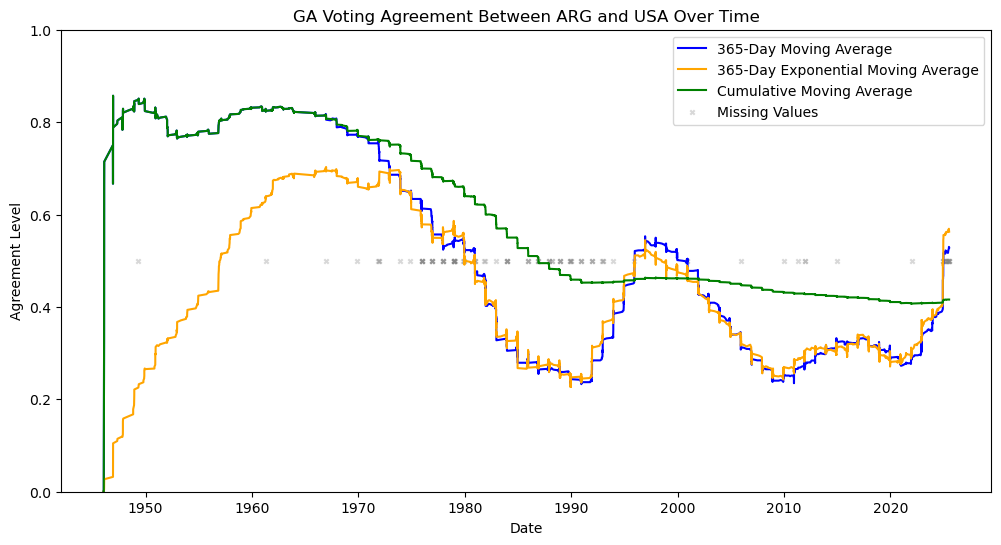

In [69]:
moving_average(df_ga_transformed, countries, time_span, start_date, end_date)